In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Feature Engineering : On doit transformer le texte (EN, MI...) en chiffres (Années)
# On fait une estimation : Junior=1 an, Mid=3 ans, Senior=5 ans, Executive=10 ans
mapping_exp = {'EN': 1, 'MI': 3, 'SE': 5, 'EX': 10}

# On crée une nouvelle colonne numérique
df_clean['years_exp'] = df_clean['experience_level'].map(mapping_exp)

# 2. Préparation des données (X = Les critères, y = La cible)
X = df_clean[['years_exp']]  # Double crochets car X doit être un tableau 2D
y = df_clean['Salaire_USD']

# 3. Création et Entraînement du modèle (L'IA apprend)
model = LinearRegression()
model.fit(X, y)

# 4. Prédiction (La boule de cristal)
# On demande au modèle : "Combien gagne quelqu'un avec 7 ans d'expérience ?"
annee_a_predire = 7
prediction = model.predict([[annee_a_predire]])

print(f"💰 Prédiction de l'IA pour {annee_a_predire} ans d'expérience : {prediction[0]:.2f} $")

# Bonus : Voir la 'pente' (Combien on gagne en plus par an d'expérience)
print(f"📈 Augmentation moyenne par année d'expérience : +{model.coef_[0]:.2f} $")

💰 Prédiction de l'IA pour 7 ans d'expérience : 198208.73 $
📈 Augmentation moyenne par année d'expérience : +14144.88 $


C:\Users\adami\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


C:\Users\adami\AppData\Local\Temp\ipykernel_3636\4277315026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


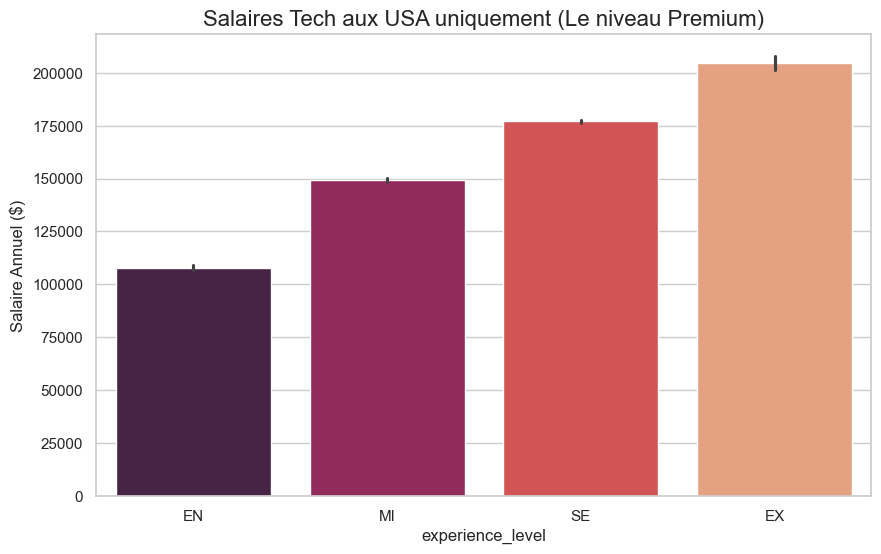

Salaire moyen d'un Senior aux USA : 177049 $


In [9]:
# On filtre : Que les jobs aux USA ('US')
df_us = df_clean[df_clean['company_location'] == 'US']

# On refait le graphique juste pour les USA
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_us,
    x='experience_level',
    y='Salaire_USD',
    order=['EN', 'MI', 'SE', 'EX'],
    estimator='mean',
    palette="rocket" # Une autre couleur pour changer
)
plt.title("Salaires Tech aux USA uniquement (Le niveau Premium)", fontsize=16)
plt.ylabel("Salaire Annuel ($)")
plt.show()

# On affiche le chiffre exact pour un Senior (SE) aux USA
moyenne_senior_us = df_us[df_us['experience_level'] == 'SE']['Salaire_USD'].mean()
print(f"Salaire moyen d'un Senior aux USA : {moyenne_senior_us:.0f} $")

In [8]:
# Calcul de la moyenne exacte par niveau
salaire_moyen = df_clean.groupby('experience_level')['Salaire_USD'].mean().sort_values()

print(salaire_moyen)

experience_level
EN    100059.640750
MI    143045.893355
SE    172768.485259
EX    200875.546612
Name: Salaire_USD, dtype: float64


C:\Users\adami\AppData\Local\Temp\ipykernel_3636\2161592971.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


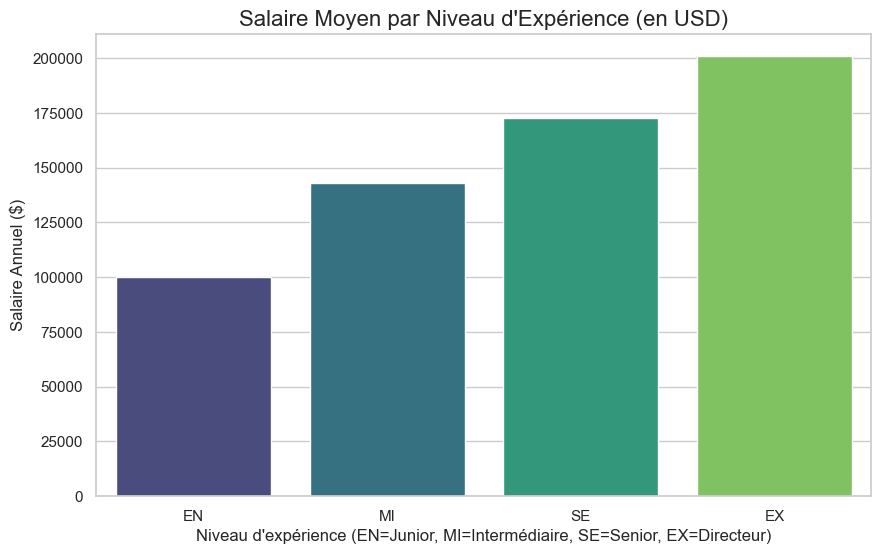

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuration du style (pour que ce soit joli)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# 2. Le calcul : Salaire moyen par niveau d'expérience
# On trie l'ordre logiquement : Entry -> Mid -> Senior -> Executive
ordre_experience = ['EN', 'MI', 'SE', 'EX']

# 3. Le graphique (Barplot)
sns.barplot(
    data=df_clean,
    x='experience_level',
    y='Salaire_USD',
    order=ordre_experience,
    estimator='mean', # On affiche la MOYENNE
    errorbar=None,     # On enlève les petites barres d'erreur pour que ce soit propre
    palette="viridis" # Une couleur moderne
)

# 4. Les titres
plt.title("Salaire Moyen par Niveau d'Expérience (en USD)", fontsize=16)
plt.xlabel("Niveau d'expérience (EN=Junior, MI=Intermédiaire, SE=Senior, EX=Directeur)")
plt.ylabel("Salaire Annuel ($)")
plt.show()

In [ ]:
# On sélectionne uniquement les colonnes stratégiques
colonnes_utiles = [
    'work_year',
    'experience_level',
    'employment_type',
    'job_title',
    'salary_in_usd',
    'employee_residence',
    'remote_ratio',
    'company_location',
    'company_size'
]

df_clean = df[colonnes_utiles].copy()

# On renomme la colonne salaire pour que ce soit plus clair
df_clean = df_clean.rename(columns={'salary_in_usd': 'Salaire_USD'})

# Vérification
df_clean.head()

,work_year,experience_level,employment_type,job_title,Salaire_USD,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Research Scientist,208000,US,0,US,M
1,2025,MI,FT,Research Scientist,147000,US,0,US,M
2,2025,SE,FT,Research Scientist,173000,US,0,US,M
3,2025,SE,FT,Research Scientist,117000,US,0,US,M
4,2025,MI,FT,AI Engineer,100000,US,100,US,M


In [ ]:
# Affiche le Top 20 des métiers les plus fréquents 
df['job_title'].value_counts().head(20)

job_title
Data Scientist                    13848
Data Engineer                     11323
Software Engineer                 10133
Data Analyst                       9081
Machine Learning Engineer          6643
Engineer                           5804
Manager                            3832
Research Scientist                 2641
Analyst                            2314
Applied Scientist                  1816
Data Architect                     1557
Analytics Engineer                 1424
Product Manager                    1394
Associate                          1271
Research Engineer                  1249
AI Engineer                         936
Data Manager                        761
Business Intelligence Engineer      702
Machine Learning Researcher         669
Consultant                          657
Name: count, dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93597 entries, 0 to 93596
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           93597 non-null  int64 
 1   experience_level    93597 non-null  object
 2   employment_type     93597 non-null  object
 3   job_title           93597 non-null  object
 4   salary              93597 non-null  int64 
 5   salary_currency     93597 non-null  object
 6   salary_in_usd       93597 non-null  int64 
 7   employee_residence  93597 non-null  object
 8   remote_ratio        93597 non-null  int64 
 9   company_location    93597 non-null  object
 10  company_size        93597 non-null  object
dtypes: int64(4), object(7)
memory usage: 7.9+ MB


In [ ]:
import pandas as pd

# Chargement du fichier
df = pd.read_csv('salaries.csv')


df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Research Scientist,208000,USD,208000,US,0,US,M
1,2025,MI,FT,Research Scientist,147000,USD,147000,US,0,US,M
2,2025,SE,FT,Research Scientist,173000,USD,173000,US,0,US,M
3,2025,SE,FT,Research Scientist,117000,USD,117000,US,0,US,M
4,2025,MI,FT,AI Engineer,100000,USD,100000,US,100,US,M
